## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../matplotlib-challenge/Resources/Mouse_metadata.csv"
study_results_path = "../matplotlib-challenge/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "inner")

# Display the data table for preview
combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
number_mice = combined_df["Mouse ID"].unique()
len(number_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989 = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_g989

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != "g989"]
clean_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1880 rows x 8 columns]

In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = clean_df["Mouse ID"].unique()
len(number_mice_clean)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_deviation = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_df

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = clean_df.groupby("Drug Regimen").agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_df

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Measurements for Each Treatment Regimen'}, xlabel='Drug Regimen', ylabel='Number of Measurements'>

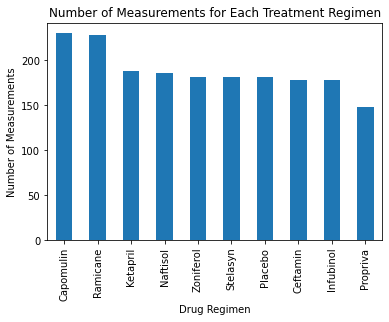

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = clean_df["Drug Regimen"].value_counts().plot.bar()

# Label axes and title bar plot
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Measurements")
bar_plot.set_title("Number of Measurements for Each Treatment Regimen")

# Show plot
bar_plot

Text(0.5, 1.0, 'Number of Measurements for Each Treatment Regimen')

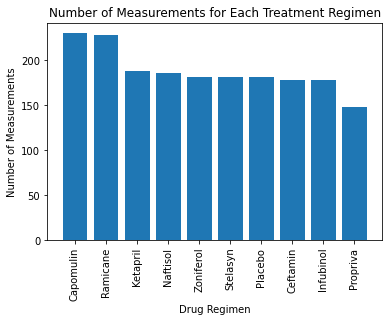

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Get measurements data for x acis
measurements = clean_df["Drug Regimen"].value_counts()
x_axis = np.arange(len(measurements))

# Label each bar with drug name
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, measurements.index.values)
plt.xticks(rotation=90)

# Create and label bar plot
plt.bar(x_axis, measurements)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements for Each Treatment Regimen")

Text(0, 0.5, '')

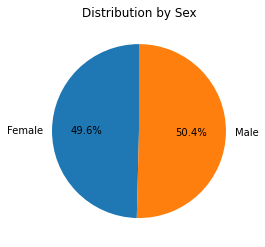

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create data frame with percentage of mice by gender
grouped_gender = clean_df.groupby(["Mouse ID", "Sex"])
gender = pd.DataFrame(grouped_gender.size())

mouse_gender = pd.DataFrame(gender.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# Create pie plot using pandas
pie = mouse_gender["Percentage of Sex"].plot.pie(autopct="%1.1f%%", startangle=90, title="Distribution by Sex")

# Hide y label
pie.set_ylabel("")

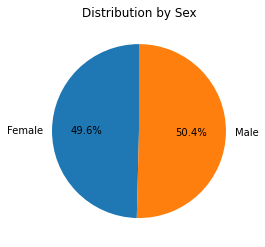

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender["Percentage of Sex"], labels=mouse_gender.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Distribution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
filtered_drugs = clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin") | (clean_df['Drug Regimen'] == "Ramicane") | (clean_df['Drug Regimen'] == "Infubinol") | (clean_df['Drug Regimen'] == "Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse
last_time = filtered_drugs.groupby("Mouse ID")["Timepoint"].max()
last_time_df = pd.DataFrame({"Timepoint": last_time})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(filtered_drugs, last_time_df, on= ["Mouse ID", "Timepoint"])
merged_df

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16         45   
1      s185    Capomulin  Female           3          17         45   
2      x401    Capomulin  Female          16          15         45   
3      m601    Capomulin    Male          22          17         45   
4      g791     Ramicane    Male          11          16         45   
..      ...          ...     ...         ...         ...        ...   
95     x822     Ceftamin    Male           3          29         45   
96     y163    Infubinol  Female          17          27         45   
97     y769     Ceftamin  Female           6          27         45   
98     y865     Ceftamin    Male          23          26         45   
99     z581    Infubinol  Female          24          25         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            22.050126                 1  
1            23.343598                 1  
2            28.484033                 0  
3            28.430964                 1  
4            29.128472                 1  
..                 ...               ...  
95           61.386660                 3  
96           67.685569                 3  
97           68.594745                 4  
98           64.729837                 3  
99           62.754451                 3  

[100 rows x 8 columns]

In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    by_drug = merged_df.loc[merged_df["Drug Regimen"] == treatment, :]
    tumor_data = by_drug["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume.append(tumor_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = by_drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The IQR for {treatment} is {iqr}.")
    print(f"Values below {lower_bound} could be outliers for {treatment}.")
    print(f"Values above {upper_bound} could be outliers for {treatment}.")
    
    # Determine outliers using upper and lower bounds
    outliers_count = (tumor_data.loc[(by_drug['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (by_drug['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f"Number of outliers for {treatment}: {outliers_count}")

The IQR for Capomulin is 7.781863460000004.
Values below 20.70456164999999 could be outliers for Capomulin.
Values above 51.83201549 could be outliers for Capomulin.
Number of outliers for Capomulin: 0
The IQR for Ramicane is 9.098536719999998.
Values below 17.912664470000003 could be outliers for Ramicane.
Values above 54.30681135 could be outliers for Ramicane.
Number of outliers for Ramicane: 0
The IQR for Infubinol is 11.477135160000003.
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.
Number of outliers for Infubinol: 1
The IQR for Ceftamin is 15.577752179999997.
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.
Number of outliers for Ceftamin: 0


([<matplotlib.axis.XTick at 0x7fc702f70640>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

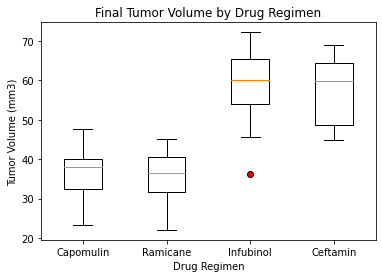

In [33]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Highlight outlier data
flierprops = dict(marker = 'o', markerfacecolor = 'r')

# Create box plot
plt.boxplot(tumor_volume, flierprops = flierprops)

# Label title and axes
plt.title("Final Tumor Volume by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
